# 2-D Random Walker

### Notes
See the inputs and time class for simulation parameters, feel free to modify any of them.

The simulations varible in the inputs class specifies which simulation(s) to run. The number value specifies the number of steps. If you want it to only run one simulation, just pass in a list with one initialized value. 

Results and vpython canvas are displayed under the cell.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

num steps = 50
Total distance traveled = 60.35533905932735 units.
Average travel radius = 7.146794454325438 units.
Expected travel radius = 7.0710678118654755
Error from expected sqrt(num_steps) = 0.07572664245996208.


<IPython.core.display.Javascript object>

num steps = 100
Total distance traveled = 121.12489168102775 units.
Average travel radius = 9.568842670448682 units.
Expected travel radius = 10.0
Error from expected sqrt(num_steps) = 0.43115732955131847.


<IPython.core.display.Javascript object>

num steps = 200
Total distance traveled = 244.32085117392168 units.
Average travel radius = 11.385651208422807 units.
Expected travel radius = 14.142135623730951
Error from expected sqrt(num_steps) = 2.756484415308144.


<IPython.core.display.Javascript object>

num steps = 300
Total distance traveled = 361.303607231219 units.
Average travel radius = 6.816287733066601 units.
Expected travel radius = 17.320508075688775
Error from expected sqrt(num_steps) = 10.504220342622173.
The next simulation's output will be below the canvas.


<IPython.core.display.Javascript object>

num steps = 400
Total distance traveled = 496.9259735953062 units.
Average travel radius = 17.624328662102172 units.
Expected travel radius = 20.0
Error from expected sqrt(num_steps) = 2.3756713378978276.


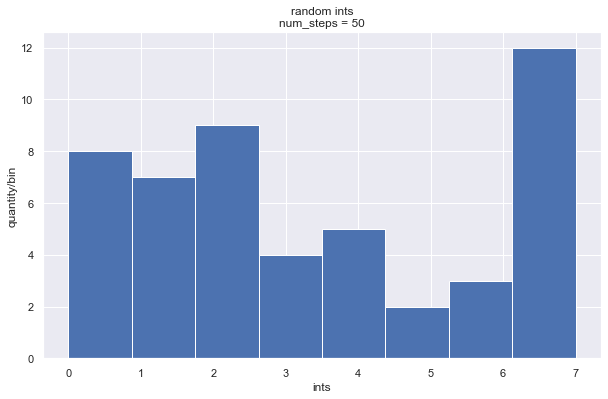

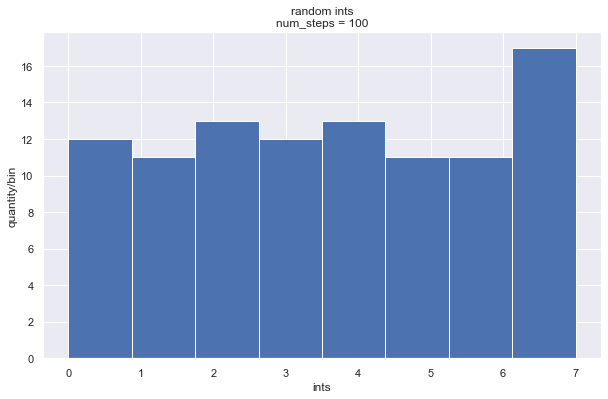

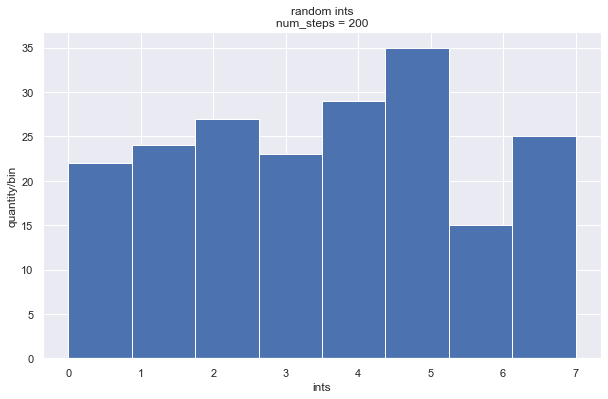

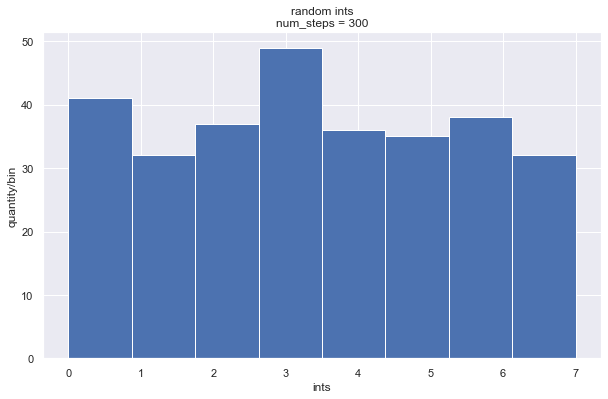

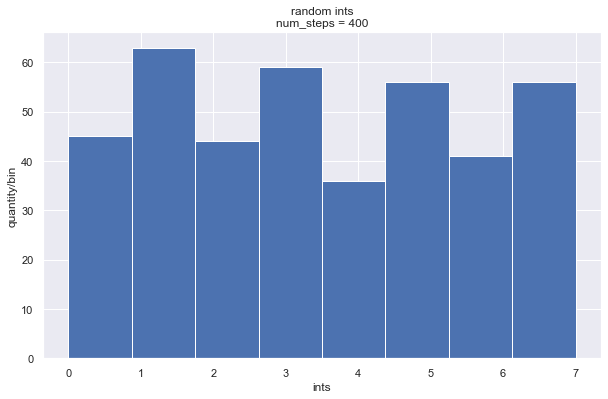

In [1]:
from vpython import*
import math
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import mean
sns.set_theme()
%matplotlib inline
scene = canvas()
scene.background=color.black


################ INPUTS #####################

class inputs:
    visualize = True #visualize the traveled path
    center_camera = True #whether to center the camera to the path or not
    verify_random = True #prints a histogram of all the chosen random values to ensure uniformity. 
    save_plots = verify_random & False #saves histogram plot to CWD
    
    # the size of the list will determine how many times the walker will run
    # each index contains the number of steps for that simulation
    # simulations HAS TO BE A LIST.
    simulations = [50,100,200,300,400] 
    delay_time_between_sim = 1.5 #delay between each simulation
    
    cylinder_radius = 0.08
    random_func = np.random.randint 
    

################ TIME #######################
class time:
    sim_rate = 500
    
############### RANDOM WALKER ###############

class walker:
    #walk in xy plane
    directions = [vector(1,0,0), vector(1,1,0), vector(0,1,0),
                  vector(-1,1,0), vector(-1,0,0), vector(-1,-1,0),
                  vector(0,-1,0), vector(1,-1,0)]
    directions_len = len(directions)
    
    def __init__(self, num_steps):
        self.mover = sphere(color = color.orange, pos = vector(0,0,0), radius = 0.15) 
        self.position_sum = vector(0,0,0)
        self.distance_sum = 0
        self.num_moves = 0
        self.random_verify = np.empty(num_steps,dtype=int)
        self.origin = pyramid(pos=vector(0,0,0), size=vector(1,0.7,0.7), axis = vector(0,0,2), color = color.red)
        self.distance_walked = 0
        self.distances = list()
        self.average_distance_from_origin = 0
        for direction in walker.directions:
            self.distances.append(mag(direction))
        
    def walk(self):
        
        self.num_moves += 1
        
        if inputs.center_camera:
            self.position_sum += self.mover.pos
            scene.center = self.position_sum / self.num_moves
            
        self.distance_sum += mag(self.mover.pos)
        self.average_distance_from_origin = self.distance_sum / self.num_moves
            
        random_int = inputs.random_func(0,walker.directions_len, None)
        new_pos = walker.directions[random_int]
        self.distance_walked += self.distances[random_int]
        if inputs.verify_random:
            self.random_verify[self.num_moves-1] = random_int
        if inputs.visualize:
            cylinder(pos= self.mover.pos, axis = new_pos, radius = inputs.cylinder_radius)
            self.mover.pos += new_pos
        else:
            self.mover.pos += new_pos
            
            
################ SIMULATION #################

# run all specififed simulations
for idx in range(0,len(inputs.simulations)):
    
    # setup individual simulation
    num_steps = inputs.simulations[idx]
    step_count = 0
    w = walker(num_steps)
    
    #run individual simulation
    while step_count < num_steps:
        rate(time.sim_rate)
        w.walk()
        step_count+=1
    
    # print results
    print(f'num steps = {num_steps}')
    print(f'Total distance traveled = {w.distance_walked} units.')
    print(f'Average travel radius = {w.average_distance_from_origin} units.')
    print(f'Expected travel radius = {sqrt(num_steps)}')
    print(f'Error from expected sqrt(num_steps) = {abs(sqrt(num_steps)-w.average_distance_from_origin)}.')
    if idx is (len(inputs.simulations)-2):
        print("The next simulation's output will be below the canvas.")
    sleep(inputs.delay_time_between_sim)
    
    # plotting to check if uniform distribution for random numbers
    if inputs.verify_random:
        plt.figure(num=idx,figsize=(10,6))
        plt.hist(w.random_verify,bins=w.directions_len)
        plt.xlabel(f'ints')
        plt.ylabel("quantity/bin")
        plt.title(f'random ints\nnum_steps = {num_steps}')
        if inputs.save_plots:
            fname = f'rand_ints-numsteps_{num_steps}'
            plt.savefig(fname, bbox_inches= "tight")
    
    # delete the scene but when its the last simulation
    if idx is not (len(inputs.simulations)-1):
        scene.delete()
        scene = canvas()


### Results from a few runs

##### Shorter Runs
num steps = 50 <br>
Total distance traveled = 57.4558441227157 units. <br>
Average travel radius = 4.665832183691638 units. <br>
Expected travel radius = 7.0710678118654755 <br>
Error from expected sqrt(num_steps) = 2.4052356281738376. <br>

num steps = 100 <br>
Total distance traveled = 120.71067811865467 units. <br>
Average travel radius = 13.768952428184184 units. <br>
Expected travel radius = 10.0 <br>
Error from expected sqrt(num_steps) = 3.7689524281841837. <br>

num steps = 200 <br>
Total distance traveled = 241.00714267493686 units. <br>
Average travel radius = 6.733021545717945 units. <br>
Expected travel radius = 14.142135623730951 <br>
Error from expected sqrt(num_steps) = 7.409114078013006. <br>

num steps = 300 <br>
Total distance traveled = 365.44574285495 units. <br>
Average travel radius = 12.620965665792756 units. <br>
Expected travel radius = 17.320508075688775 <br>
Error from expected sqrt(num_steps) = 4.699542409896019. <br>

num steps = 400 <br>
Total distance traveled = 484.08535316173993 units. <br>
Average travel radius = 12.48811048755936 units. <br>
Expected travel radius = 20.0 <br>
Error from expected sqrt(num_steps) = 7.511889512440639. <br>

##### Longer Runs

num steps = 7500 <br>
Total distance traveled = 9042.117092715342 units. <br>
Average travel radius = 65.6409118642251 units. <br>
Expected travel radius = 86.60254037844386 <br>
Error from expected sqrt(num_steps) = 20.96162851421876. <br>

num steps = 10000 <br>
Total distance traveled = 12072.724666115593 units. <br>
Average travel radius = 54.81260682785083 units. <br>
Expected travel radius = 100.0 <br>
Error from expected sqrt(num_steps) = 45.18739317214917. <br>

num steps = 15000 <br>
Total distance traveled = 18096.660592302465 units. <br>
Average travel radius = 145.89619820917582 units. <br>
Expected travel radius = 122.47448713915891 <br>
Error from expected sqrt(num_steps) = 23.42171107001691. <br>

num steps = 30000<br>
Total distance traveled = 36238.470462898884 units. <br>
Average travel radius = 160.2910604758035 units. <br>
Expected travel radius = 173.20508075688772 <br>
Error from expected sqrt(num_steps) = 12.91402028108422.<br>

### Plots of the generated random numbers
![title](rand_ints-numsteps_10.png) <br>
![title](rand_ints-numsteps_50.png) <br>
![title](rand_ints-numsteps_100.png) <br>
![title](rand_ints-numsteps_200.png) <br>
![title](rand_ints-numsteps_500.png) <br>
![title](rand_ints-numsteps_800.png) <br>
![title](rand_ints-numsteps_5000.png) <br>
![title](rand_ints-numsteps_7500.png) <br>

### Analysis

For all of the step numbers, we can see the that error is pretty small and that the average distance walked is on the order of root(n). This number can vary greatly between runs though due to the walker's random nature. 

For the random numbers, we can see that as num_steps increases, the distributtion converges to uniformity. 



### References
1) https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html <br>
2) https://matplotlib.org/stable/gallery/statistics/hist.html <br>

# 1-D Cellular Automaton

### Some Notes
My code can generate the output for any rule number, just specify the rule number you would like to run in the inputs class. I do like the following rules though, 109 and 45, since they are sort of ordered but keep a little bit of that chaotic nature. 

The stopping condition is set by total_steps in the input class. This is specified by the user. Total_steps is essientially the number of generations to simulate for the cells. Once the number of generations is reached, the simulation stops.

You can also change the colors of the live and dead cells and of the background as well. There are some other settings in the input class that you are welcome to mess around with. Note that the 1-D size is determined by how many steps you choose to run. Feel free to also change the parameter(s) in the time class.

In [1]:
from vpython import*
import math
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statistics import mean
sns.set_theme()
%matplotlib inline
scene = canvas()
# scene.background=color.black


################ INPUTS #####################

class inputs:
    rule = 45 #109 #45
    total_steps = 45 #default: 16 to match the wolfram article
    livecolor = color.white # COLOR OF ALIVE CELL
    deadcolor = color.red   # COLOR OF DEAD CELL
    backgroundcolor = color.black #COLOR OF BACKGROUND
    overwrite_current_row = False
    center_camera = True

################ TIME #######################
class time:
    sim_rate = 5
    
############ Cellular Automaton #############

class cells:
    
    def __init__(self, rule,total_steps):
        self.num_steps = 0
        
        #most follow a pyramid shape, so make the width large enough so it fits the last row
        self.currstate = [0] * (2*inputs.total_steps-1)
        self.currstate[len(self.currstate)//2] = 1
        self.draw_row()
        self.rule_num = rule
        self.rule_solution = [0] * 8
        for i in range(0,8):
            self.rule_solution[i] = (self.rule_num >> i) % 2 
        if inputs.center_camera:
            scene.center = vector(0,-total_steps/2, 0)
    
    def calc_next_state(self):
        length = len(self.currstate)
        nextstate = [0] * length
        #run all of them besides the one that would cause outofbounds error
        for idx in range(1,length-1):
            # calc the int value by treating the three cells as binary numbers with the MSB being the left cell
            # and then just index the rule solution with it
            lookup_val = (self.currstate[idx-1] << 2) | (self.currstate[idx] << 1) | (self.currstate[idx+1])
            nextstate[idx] = self.rule_solution[lookup_val]
        
        nextstate[0] = self.rule_solution[(self.currstate[0] << 1) | (self.currstate[1])]
        nextstate[length-1] = self.rule_solution[(self.currstate[length-2] << 2) | (self.currstate[length-1] << 1)]
 
        self.currstate = nextstate
        self.draw_row()
        
    
    def draw_row(self):
        start_index = 0 - len(self.currstate)//2
        if inputs.overwrite_current_row:
            count = 0
            position = vector(start_index, 0, 0)
            for state in self.currstate:
                position.x += 1
                scene.objects[count] = box(pos=position, size=vector(0.92,0.92,0.92), 
                                           color = inputs.livecolor if state else inputs.deadcolor)
                count += 1
        else:
            position = vector(start_index, -self.num_steps, 0)
            for state in self.currstate:
                position.x += 1
                box(pos=position, size=vector(0.92,0.92,0.92), color = inputs.livecolor if state else inputs.deadcolor)
        self.num_steps +=1
            
################ SIMULATION #################
scene.background=inputs.backgroundcolor
c = cells(inputs.rule,inputs.total_steps)
while c.num_steps < inputs.total_steps:
    rate(time.sim_rate)
    c.calc_next_state()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### References

1) https://mathworld.wolfram.com/ElementaryCellularAutomaton.html <br>

# Game of Life

### How to Operate

#### Patterns Class
Contains a list of (row,col) coordinates to create the patterns listed in https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life. Most of them implemented but not all of them. 

The patterns class also contains an offset method which allows you to move the pattern to any position within the grid. Pass in pattern to offset, the new coordinate you want the bottom left corner of the pattern to be, and finally the grid size that was specified in inputs class (for bounds checking). If you offset out of bounds, it will not error and will print warning statements in the ouptut. It will screw up the pattern you are trying to offset though. 

You can use the patterns class to specify the initial live cells in the Game of Life. Here's a code example: <br>
init_cells = patterns.offset(patterns.glider, [grid_size[0]//2,grid_size[0]//2], grid_size) <br>
init_cells += patterns.offset(patterns.penta, [grid_size[0]//4,grid_size[0]//4], grid_size) <br>
init_cells += patterns.offset(patterns.beacon, [3\*grid_size[0]//4,3\*grid_size[0]//4], grid_size) <br>
init_cells += patterns.offset(patterns.blinker, [grid_size[0]-1,grid_size[0]-3], grid_size) <br>

<b><i> Note: the coordinates are specified in (row,col). The bottom left corner is at the world origin (0,0,0) and is also row 0 and col 0. Rows increase positively going up the screen and cols increase positively to the right. </i></b>
  
#### Inputs Class

This is where you customize the simulation. Specify the size of the grid (doesn't have to be a square), the initial live cells, the num of steps to run for, color of live cells, color of dead cells, and color of the simulation background.

#### Time Class

Specify the simulation rate.

In [17]:
from vpython import*
import math
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
from statistics import mean
sns.set_theme()
%matplotlib inline
scene = canvas()
# scene.background=color.black


############ GoL PATTERNS ###################
class patterns:
    # NOTE: BOTTOM LEFT OF THE GRID IS 0,0
    
    #still lifes
    block = [[0,0],[0,1],[1,0],[1,1]]
    beehive = [[1,0],[0,1],[0,2],[1,3],[2,1],[2,2]]
    loaf = [[2,0],[1,1],[0,2],[1,3],[2,3],[3,1],[3,2]]
    
    #oscillators
    blinker = [[0,0],[0,1],[0,2]]
    toad = [[0,0],[0,1],[0,2], [1,1],[1,2],[1,3]]
    beacon = [[2,0],[3,0],[3,1],[0,2],[0,3],[1,3]]
    penta = [[0,1],[0,2],[0,3],[2,0],[3,0],[2,4],[3,4],[5,1],[5,2],[5,3]] + [[8,1],[8,2],[8,3],[10,0],[11,0],[10,4],[11,4],[13,1],[13,2],[13,3]]
    
    #spaceships
    glider = [[2,0],[2,2],[1,1],[1,2],[0,1]]
    lightship = [[0,1],[0,2],[1,0],[1,1],[1,2],[1,3],[2,0],[2,1],[2,3],[2,4],[3,2],[3,3]]
    
    #custom
    custom1 = [[1,1],[1,0],[0,1],[1,2],[2,1]] #eventually makes an oscillator
    custom2 = [[0,2],[1,0],[1,1],[1,3],[1,4],[2,2],[2,3],[3,0],[3,1],[3,2],[3,4],[4,1],[4,2],[4,3],[4,4],[5,2],[5,3],[6,2]] #ends nicely
    custom3 = [[1,0],[0,1],[0,2],[1,3],[2,1],[2,2],[0,3]]
    
    # pass in pattern to offset, 
    # the new coordinate you want the bottom left corner of the pattern to be,
    # and finally the grid size that was specified in inputs class (for bounds checking)
    def offset(pattern, coords, grid_size):
        newlist = [[0]*2] * len(pattern)
        for idx in range(0,len(pattern)):
            newrow = pattern[idx][0]+coords[0]
            newcol = pattern[idx][1]+coords[1]
            if newrow >= grid_size[0] or newcol >= grid_size[1]:
                # I could just make the invalid offsets just wrap too, maybe a future thing
                print("INVALID OFFSET DETECTED (OUT OF BOUNDS ERROR). YOUR PATTERN WILL NOT BE OFFSET CORRECTLY.")
                if newrow >= grid_size[0]:
                    newrow = grid_size[0] - 1
                if newcol >= grid_size[1]:
                    newcol = grid_size[1] - 1
            newlist[idx] = [newrow,newcol]
        return newlist


################ INPUTS #####################

class inputs:
    grid_size = [25, 25] #[row,col]
    
    #initial live cells
    # INITIAL STATE 1
    # init_cells = patterns.offset(patterns.glider, [grid_size[0]//2,grid_size[0]//2], grid_size)
    # init_cells += patterns.offset(patterns.penta, [grid_size[0]//4*-1,grid_size[0]//4], grid_size)
    # init_cells += patterns.offset(patterns.beacon, [3*grid_size[0]//4,3*grid_size[0]//4], grid_size)
    # init_cells += patterns.offset(patterns.blinker, [grid_size[0]-1,grid_size[0]-3], grid_size)
    # init_cells += patterns.offset(patterns.block, [grid_size[0]//8*7,grid_size[0]//8], grid_size)

    # INITIAL STATE 2
    init_cells = patterns.offset(patterns.glider, [grid_size[0]//2,grid_size[0]//2], grid_size)
    init_cells += patterns.offset(patterns.penta, [grid_size[0]//4,grid_size[0]//4], grid_size)
    init_cells += patterns.offset(patterns.beacon, [3*grid_size[0]//4,3*grid_size[0]//4], grid_size)
    init_cells += patterns.offset(patterns.blinker, [grid_size[0]-1,grid_size[0]-3], grid_size)
    init_cells += patterns.offset(patterns.block, [grid_size[0]//8*7,grid_size[0]//8], grid_size)

    # INITIAL STATE 3
    # init_cells = patterns.offset(patterns.custom1, [grid_size[0]//2,grid_size[0]//2], grid_size)
    
    # INITIAL STATE 4
    # init_cells = patterns.offset(patterns.custom2, [grid_size[0]//2,grid_size[0]//2], grid_size)
    
    # INITIAL STATE 5
    # init_cells = patterns.offset(patterns.custom3, [grid_size[0]//2,grid_size[0]//2], grid_size)
    
    # INITIAL STATE 6
    # init_cells = patterns.offset(patterns.lightship, [grid_size[0]//4*3,grid_size[0]//4*3], grid_size)
    
    print(init_cells)
    
    total_steps = 120 
    livecolor = color.white # COLOR OF ALIVE CELL
    deadcolor = color.red   # COLOR OF DEAD CELL
    backgroundcolor = color.black #COLOR OF BACKGROUND

    
################ TIME #######################
class time:
    sim_rate = 3
    
############ GAME OF LIFE #############

class game_of_life:
    
    def __init__(self, grid_size, total_steps, initial):
        self.num_steps = 0
        self.gridrow_dim = grid_size[0]
        self.gridcol_dim = grid_size[1]
        # self.curr_states.shape
        self.curr_states = np.zeros([self.gridrow_dim,self.gridcol_dim], dtype = bool)
        self.next_states = np.empty([self.gridrow_dim,self.gridcol_dim], dtype = bool)
        self.objects = np.empty([self.gridrow_dim,self.gridcol_dim], dtype = box)
        
        # initial is a 2d array where each index of the array holds a set of coordinates to set to a one
        for each in initial:
            self.curr_states[each[0],each[1]] = True
            
        self.draw_grid(True)
        
    def game_update(self):
        for row in range(0,self.gridrow_dim):
            for col in range(0, self.gridcol_dim):
                numliving = int(self.curr_states[row-1,col]) + int(self.curr_states[row-1,self.get_col(col+1)]) + int(self.curr_states[row,self.get_col(col+1)]) 
                numliving += int(self.curr_states[self.get_row(row+1),self.get_col(col+1)]) + int(self.curr_states[self.get_row(row+1),col])
                numliving += int(self.curr_states[self.get_row(row+1),col-1]) + int(self.curr_states[row,self.get_col(col-1)]) + int(self.curr_states[row-1,col-1])
                if numliving >= 4:
                    self.next_states[row,col] = 0
                elif numliving < 2:
                    self.next_states[row,col] = 0
                elif numliving == 3:
                    self.next_states[row,col] = 1
                else:
                    self.next_states[row,col] = self.curr_states[row,col]
                    
        # deepcopy needed for greater than 1d arrays!
        self.curr_states = copy.deepcopy(self.next_states)
            
        self.draw_grid(False)
    
    def get_row(self,idx):
        if idx > (self.gridrow_dim-1):
            return 0
        return idx
    
    def get_col(self,idx):
        if idx > (self.gridcol_dim-1):
            return 0
        return idx
    
    
    def draw_grid(self,isfirst):
        vect = vector(0,0,0)
        boxsize = vector(0.92,0.92,0.92)
        if isfirst:
            for row in range(0,self.gridrow_dim):
                for col in range(0,self.gridcol_dim):
                    self.objects[row,col] = box(pos=vect, size=boxsize, color = inputs.livecolor 
                                                 if self.curr_states[row,col] else inputs.deadcolor)
                    vect.x += 1
                vect.y += 1
                vect.x = 0
        else:
            for row in range(0,self.gridrow_dim):
                for col in range(0,self.gridcol_dim):
                    self.objects[row,col].color = inputs.livecolor if self.curr_states[row,col] else inputs.deadcolor
                    vect.x += 1
                vect.y += 1
                vect.x = 0
        
        self.num_steps +=1
        
            
################ SIMULATION #################
scene.background=inputs.backgroundcolor
scene.center = vector(inputs.grid_size[1]/2,inputs.grid_size[0]/2,0)
g = game_of_life(inputs.grid_size,inputs.total_steps, inputs.init_cells)
T = label( pos=vec(1,inputs.grid_size[1]-1,2), text='Hello!' )
while g.num_steps < inputs.total_steps:
    rate(time.sim_rate)
    g.game_update()
    T.text = f'{g.num_steps} lt {inputs.total_steps}'



<IPython.core.display.Javascript object>

[[14, 12], [14, 14], [13, 13], [13, 14], [12, 13], [6, 7], [6, 8], [6, 9], [8, 6], [9, 6], [8, 10], [9, 10], [11, 7], [11, 8], [11, 9], [14, 7], [14, 8], [14, 9], [16, 6], [17, 6], [16, 10], [17, 10], [19, 7], [19, 8], [19, 9], [20, 18], [21, 18], [21, 19], [18, 20], [18, 21], [19, 21], [24, 22], [24, 23], [24, 24], [21, 3], [21, 4], [22, 3], [22, 4]]


### Results

Using the patterns class, I was able to easily verify that almost all of the wikipedia provided patterns work correctly, "almost" all because some of the patterns would have taken way too long to type out. 

I also verified some custom patterns I made/discovered against the simulation here https://playgameoflife.com/.

Something else I checked was to ensure that the edges all wrapped properly. I tested the spaceship patterns and confirmed that they worked correctly when wrapping around both on the right and left edges and on the top and bottom edges. 

Some of the "INITIAL STATE" blocks cover this testing. But feel free to make your own as well! 

# Game of Life with Asynchronous Updating
Using random independent scheme as the update scheme (https://en.wikipedia.org/wiki/Asynchronous_cellular_automaton)

### Operation
Runs the same as the simulation above.

However, there is a new parameter now called num_cells_to_update. This defines the number of cells to update per time cycle. The way it works is that it goes through and picks a random row and col indexes (repeats are allowed). Then the next state value is then stored in a temporary array. Once the code has updated num_cells_to_update number of cells, the loop will stop and then the next state is copied to the new (or current) state.

### Choice of Update Scheme
I decided to do random independent because I thought that this one produced the most random behavior. Other than that, didn't have a particular reason.

In [16]:
from vpython import*
import math
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
from statistics import mean
sns.set_theme()
%matplotlib inline
scene = canvas()
# scene.background=color.black


############ GoL PATTERNS ###################
class patterns:
    # NOTE: BOTTOM LEFT OF THE GRID IS 0,0
    
    #still lifes
    block = [[0,0],[0,1],[1,0],[1,1]]
    beehive = [[1,0],[0,1],[0,2],[1,3],[2,1],[2,2]]
    loaf = [[2,0],[1,1],[0,2],[1,3],[2,3],[3,1],[3,2]]
    
    #oscillators
    blinker = [[0,0],[0,1],[0,2]]
    toad = [[0,0],[0,1],[0,2], [1,1],[1,2],[1,3]]
    beacon = [[2,0],[3,0],[3,1],[0,2],[0,3],[1,3]]
    penta = [[0,1],[0,2],[0,3],[2,0],[3,0],[2,4],[3,4],[5,1],[5,2],[5,3]] + [[8,1],[8,2],[8,3],[10,0],[11,0],[10,4],[11,4],[13,1],[13,2],[13,3]]
    
    #spaceships
    glider = [[2,0],[2,2],[1,1],[1,2],[0,1]]
    lightship = [[0,1],[0,2],[1,0],[1,1],[1,2],[1,3],[2,0],[2,1],[2,3],[2,4],[3,2],[3,3]]
    
    #custom
    custom1 = [[1,1],[1,0],[0,1],[1,2],[2,1]] #eventually makes an oscillator
    custom2 = [[0,2],[1,0],[1,1],[1,3],[1,4],[2,2],[2,3],[3,0],[3,1],[3,2],[3,4],[4,1],[4,2],[4,3],[4,4],[5,2],[5,3],[6,2]] #ends nicely
    custom3 = [[1,0],[0,1],[0,2],[1,3],[2,1],[2,2],[0,3]]
    
    def offset(pattern, coords, grid_size):
        newlist = [[0]*2] * len(pattern)
        for idx in range(0,len(pattern)):
            newrow = pattern[idx][0]+coords[0]
            newcol = pattern[idx][1]+coords[1]
            if newrow >= grid_size[0] or newcol >= grid_size[1]:
                # I could just make the invalid offsets just wrap too, maybe a future thing
                print("INVALID OFFSET DETECTED (OUT OF BOUNDS ERROR). YOUR PATTERN WILL NOT BE OFFSET CORRECTLY.")
                if newrow >= grid_size[0]:
                    newrow = grid_size[0] - 1
                if newcol >= grid_size[1]:
                    newcol = grid_size[1] - 1
            newlist[idx] = [newrow,newcol]
        return newlist


################ INPUTS #####################

class inputs:
    grid_size = [30, 30] #[row,col]
    
    #initial live cells
    # INITIAL STATE 1
    init_cells = patterns.offset(patterns.glider, [grid_size[0]//2,grid_size[0]//2], grid_size)
    init_cells += patterns.offset(patterns.penta, [grid_size[0]//4*-1,grid_size[0]//4], grid_size)
    init_cells += patterns.offset(patterns.beacon, [3*grid_size[0]//4,3*grid_size[0]//4], grid_size)
    init_cells += patterns.offset(patterns.blinker, [grid_size[0]-1,grid_size[0]-3], grid_size)
    init_cells += patterns.offset(patterns.block, [grid_size[0]//8*7,grid_size[0]//8], grid_size)

    # INITIAL STATE 2
#     init_cells = patterns.offset(patterns.lightship, [grid_size[0]//6*0,grid_size[0]//6*0], grid_size)
#     init_cells += patterns.offset(patterns.lightship, [grid_size[0]//6*1,grid_size[0]//5*1], grid_size)
#     init_cells += patterns.offset(patterns.lightship, [grid_size[0]//6*2,grid_size[0]//4*2], grid_size)
#     init_cells += patterns.offset(patterns.lightship, [grid_size[0]//6*5,grid_size[0]//6*5], grid_size)
#     init_cells += patterns.offset(patterns.lightship, [grid_size[0]//6*4,grid_size[0]//6*4], grid_size)
#     init_cells += patterns.offset(patterns.lightship, [grid_size[0]//6*4,grid_size[0]//6*1], grid_size)
#     init_cells += patterns.offset(patterns.lightship, [grid_size[0]//6*2,grid_size[0]//6*5], grid_size)
    print(init_cells)
    
    total_steps = 2000 
    num_cells_to_update = 30
    livecolor = color.white # COLOR OF ALIVE CELL
    deadcolor = color.red   # COLOR OF DEAD CELL
    backgroundcolor = color.black #COLOR OF BACKGROUND

    
################ TIME #######################
class time:
    sim_rate = 30
    
############ GAME OF LIFE #############

class game_of_life:
    
    def __init__(self, grid_size, total_steps, initial, num_cells_to_update):
        self.num_steps = 0
        self.gridrow_dim = grid_size[0]
        self.gridcol_dim = grid_size[1]
        # self.curr_states.shape
        self.num_cells_to_update = num_cells_to_update
        self.curr_states = np.zeros([self.gridrow_dim,self.gridcol_dim], dtype = bool)
        self.next_states = np.empty([self.gridrow_dim,self.gridcol_dim], dtype = bool)
        self.objects = np.empty([self.gridrow_dim,self.gridcol_dim], dtype = box)
        self.random_cells = np.zeros([self.gridrow_dim*self.gridcol_dim,2], dtype=int)
        # initial is a 2d array where each index of the array holds a set of coordinates to set to a one
        for each in initial:
            self.curr_states[each[0],each[1]] = True
            
        self.draw_grid(True)
        
    def game_update(self): 
        self.next_states = copy.deepcopy(self.curr_states)
        pointer = 0
        temparr = np.array([0,0])
        
        #update this many cells
        for i in range(0,self.num_cells_to_update):
            row = np.random.randint(0,self.gridrow_dim, None) 
            col = np.random.randint(0,self.gridcol_dim, None)
            
            #check if the cell has already been updated at this time step
            test = False
            temparr = np.array([row,col])
            for idx in range(0,pointer):
                if (self.random_cells[idx] == temparr).all():
                    test = True
            
            #if yes, dont add it to already used array and add a for loop cycle
            if test:
                # print("duplicate!")
                # print(self.random_cells[0:pointer])
                # print((row,col))
                i-=1
            else:
                # print("incrementpointer")
                self.random_cells[pointer] = (row,col)
                pointer+=1
                numliving = int(self.curr_states[row-1,col]) + int(self.curr_states[row-1,self.get_col(col+1)]) + int(self.curr_states[row,self.get_col(col+1)]) 
                numliving += int(self.curr_states[self.get_row(row+1),self.get_col(col+1)]) + int(self.curr_states[self.get_row(row+1),col])
                numliving += int(self.curr_states[self.get_row(row+1),col-1]) + int(self.curr_states[row,self.get_col(col-1)]) + int(self.curr_states[row-1,col-1])
                if numliving >= 4:
                    self.next_states[row,col] = 0
                elif numliving < 2:
                    self.next_states[row,col] = 0
                elif numliving == 3:
                    self.next_states[row,col] = 1
                else:
                    self.next_states[row,col] = self.curr_states[row,col]
                    
        # deepcopy needed for greater than 1d arrays!
        self.curr_states = copy.deepcopy(self.next_states)
            
        self.draw_grid(False)
    
    #they only be greater than by one so can just reset to zero
    def get_row(self,idx):
        if idx > (self.gridrow_dim-1):
            return 0
        return idx
    
    def get_col(self,idx):
        if idx > (self.gridcol_dim-1):
            return 0
        return idx
    
    
    def draw_grid(self,isfirst):
        vect = vector(0,0,0)
        boxsize = vector(0.92,0.92,0.92)
        if isfirst:
            for row in range(0,self.gridrow_dim):
                for col in range(0,self.gridcol_dim):
                    self.objects[row,col] = box(pos=vect, size=boxsize, color = inputs.livecolor 
                                                 if self.curr_states[row,col] else inputs.deadcolor)
                    vect.x += 1
                vect.y += 1
                vect.x = 0
        else:
            for row in range(0,self.gridrow_dim):
                for col in range(0,self.gridcol_dim):
                    self.objects[row,col].color = inputs.livecolor if self.curr_states[row,col] else inputs.deadcolor
                    vect.x += 1
                vect.y += 1
                vect.x = 0
        
        self.num_steps +=1
        
            
################ SIMULATION #################
scene.background=inputs.backgroundcolor
scene.center = vector(inputs.grid_size[1]/2,inputs.grid_size[0]/2,0)
g = game_of_life(inputs.grid_size,inputs.total_steps, inputs.init_cells, inputs.num_cells_to_update)
T = label( pos=vec(1,inputs.grid_size[1]-1,2), text='Hello!' )
while g.num_steps < inputs.total_steps:
    rate(time.sim_rate)
    g.game_update()
    T.text = f'{g.num_steps} lt {inputs.total_steps}'



<IPython.core.display.Javascript object>

[[17, 15], [17, 17], [16, 16], [16, 17], [15, 16], [-7, 8], [-7, 9], [-7, 10], [-5, 7], [-4, 7], [-5, 11], [-4, 11], [-2, 8], [-2, 9], [-2, 10], [1, 8], [1, 9], [1, 10], [3, 7], [4, 7], [3, 11], [4, 11], [6, 8], [6, 9], [6, 10], [24, 22], [25, 22], [25, 23], [22, 24], [22, 25], [23, 25], [29, 27], [29, 28], [29, 29], [21, 3], [21, 4], [22, 3], [22, 4]]


### Results

Well the patterns that are used in the synchronous method, dont really work that well anymore. Some stills might still work but this is because the odds of one of the cells near or on the still pattern has a very low chance of updating. The oscillators and the workship ones don't work like they did in the synchronous method. This makes sense because it's no longer updating all the cells of the spaceship or oscillator at once, which causes the pattern to break down as its originally structure isnt maintained. 


# Some Test Code

In [75]:
row = 2
col = 2
print(g.curr_states[row,col])
numliving = int(g.curr_states[row-1,col]) + int(g.curr_states[row-1,g.get_col(col+1)]) + int(g.curr_states[row,g.get_col(col+1)]) 
print(numliving)
numliving = int(g.curr_states[g.get_row(row+1),g.get_col(col+1)]) + int(g.curr_states[g.get_row(row+1),col])
print(numliving)
numliving = int(g.curr_states[g.get_row(row+1),col-1]) + int(g.curr_states[row,g.get_col(col-1)]) + int(g.curr_states[row-1,col-1])
print(numliving)

True
1
0
1
